In [11]:
# debugging and formatter
from IPython.core.debugger import set_trace

%load_ext nb_black

import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import pickle
import time

%matplotlib inline

<IPython.core.display.Javascript object>

# Anonymizing Data
While Maintaining Semantic Relationships and Distributions

In [6]:
import csv
from collections import defaultdict
from faker import Faker

fake = Faker()

In [16]:
df = pd.read_csv(
    "data/fake_data.csv",
    header=None,
    names=["name", "email", "country", "gender", "avg_rating", "long_tailed", "target"],
)

<IPython.core.display.Javascript object>

Function that will anonymize the data.
Create mappings of fields that need to be anonymized.

In [7]:
def anonymize_rows(rows):
    """
    Rows is a dict iterable that contains the fields that need to be anonymized.
    """
    names = defaultdict(fake.last_name)
    emails = defaultdict(fake.free_email)

    # Iterate over the rows from the file and yield anonymized rows.
    for row in rows:
        # Replace name and email fields with faked fields.
        row["name"] = names[row["name"]]
        row["email"] = emails[row["email"]]

        # Yield the row back to the caller
        yield row

Function that takes our source file and outputs our target file.

In [8]:
def anonymize(source, target):
    """
    The source argument is a path to a csv file containing data to anonymize,
    while target is a path to write the anonymized csv data to.
    """
    with open(source, "r", newline="") as f:
        with open(target, "w") as o:
            # Use DictReader to easily extract fields
            reader = csv.DictReader(f)
            next(reader)
            writer = csv.DictWriter(o, reader.fieldnames)

            # Read and anonymize data, writing to target file.
            for row in anonymize_rows(reader):
                writer.writerow(row)

In [9]:
anonymize("data/fake_data.csv", "data/anonymized_fake_data.csv")

In [17]:
df2 = pd.read_csv(
    "data/anonymized_fake_data.csv",
    header=None,
    names=["name", "email", "country", "gender", "avg_rating", "income", "target"],
)

<IPython.core.display.Javascript object>

In [18]:
df2.head(5)

name                      email         country gender  avg_rating  \
1   Hanson       robert69@hotmail.com         Belgium      F           4   
2     Hill      powerserika@yahoo.com         Belgium      F           4   
3     Vega         edward97@yahoo.com  United Kingdom      M           0   
4  Hopkins    victoranthony@gmail.com         Belgium      M           4   
5    Ramos  danielhubbard@hotmail.com         Belgium      F           1   

      income  target  
1  21.607520       1  
2   1.775435       0  
3  12.768028       0  
4  82.630362       0  
5  17.742259       0

<IPython.core.display.Javascript object>

We can see that the distribution remains the same.


In [19]:
df_names = df["name"].value_counts()[:10]
df2_names = df2["name"].value_counts()[:10]

<IPython.core.display.Javascript object>

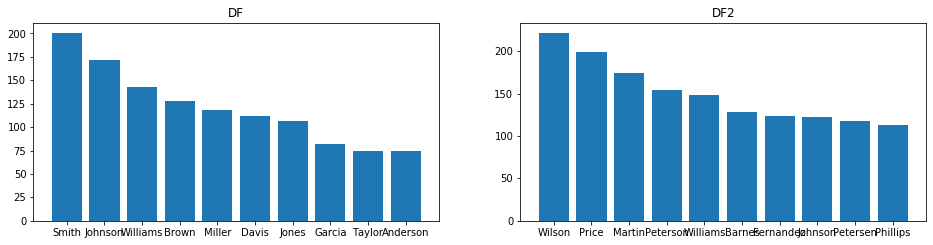

<IPython.core.display.Javascript object>

In [20]:
f = plt.figure(1, figsize=(16, 8))
ax1 = f.add_subplot(2, 2, 1)
ax1.title.set_text("DF")
_ = ax1.bar(df_names.index, df_names.values)

ax2 = f.add_subplot(2, 2, 2)
ax2.title.set_text("DF2")
_ = ax2.bar(df2_names.index, df2_names.values)